<a href="https://colab.research.google.com/github/AchyuthaPDX/Adventure-in-NLP-project/blob/main/A_NLP_ARC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_easy_train = pd.read_csv('/content/drive/My Drive/ARC/ARC-Easy-Train.csv')
df_easy_dev = pd.read_csv('/content/drive/My Drive/ARC/ARC-Easy-Dev.csv')
df_easy_test = pd.read_csv('/content/drive/My Drive/ARC/ARC-Easy-Test.csv')

In [ ]:
df_challenge_train = pd.read_csv('/content/drive/My Drive/ARC/ARC-Challenge-Train.csv')
df_challenge_dev = pd.read_csv('/content/drive/My Drive/ARC/ARC-Challenge-Dev.csv')
df_challenge_test = pd.read_csv('/content/drive/My Drive/ARC/ARC-Challenge-Test.csv')

In [ ]:
print(f'Shape of train easy dataset is {df_easy_train.shape}')
print(f'Shape of dev easy dataset is {df_easy_dev.shape}')
print(f'Shape of test easy dataset is {df_easy_test.shape}')

Shape of train easy dataset is (2251, 12)
Shape of dev easy dataset is (570, 12)
Shape of test easy dataset is (2376, 12)


In [ ]:
print(f'Shape of train challenge dataset is {df_challenge_train.shape}')
print(f'Shape of dev challenge dataset is {df_challenge_dev.shape}')
print(f'Shape of test challenge dataset is {df_challenge_test.shape}')

Shape of train challenge dataset is (1119, 12)
Shape of dev challenge dataset is (299, 12)
Shape of test challenge dataset is (1172, 12)


In [ ]:
df_easy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   questionID                2251 non-null   object 
 1   originalQuestionID        2251 non-null   object 
 2   totalPossiblePoint        2251 non-null   int64  
 3   AnswerKey                 2251 non-null   object 
 4   isMultipleChoiceQuestion  2251 non-null   int64  
 5   includesDiagram           2251 non-null   int64  
 6   examName                  2251 non-null   object 
 7   schoolGrade               2251 non-null   int64  
 8   year                      2251 non-null   object 
 9   question                  2251 non-null   object 
 10  subject                   0 non-null      float64
 11  category                  2251 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 211.2+ KB


In [ ]:
df_easy_train.head(5)

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,schoolGrade,year,question,subject,category
0,Mercury_7220990,7220990,1,B,1,0,Mercury,8,2015,Which factor will most likely cause a person t...,NaN,Train
1,MCAS_2007_8_5189,5189,1,B,1,0,MCAS,8,2007,Lichens are symbiotic organisms made of green ...,NaN,Train
2,Mercury_SC_401169,401169,1,D,1,0,Mercury,5,2015,When a switch is used in an electrical circuit...,NaN,Train
3,MCAS_2004_8_27,27,1,A,1,0,MCAS,8,2004,Which of the following is an example of an ass...,NaN,Train
4,NYSEDREGENTS_2006_8_10,10,1,3,1,0,NYSEDREGENTS,8,2006,"Rocks are classified as igneous, metamorphic, ...",NaN,Train


In [ ]:
df_easy_train.columns

Index(['questionID', 'originalQuestionID', 'totalPossiblePoint', 'AnswerKey',
       'isMultipleChoiceQuestion', 'includesDiagram', 'examName',
       'schoolGrade', 'year', 'question', 'subject', 'category'],
      dtype='object')

In [ ]:
imp_columns = ['AnswerKey','isMultipleChoiceQuestion','includesDiagram','question']

df_easy_train = df_easy_train[imp_columns]
df_easy_dev = df_easy_dev[imp_columns]
df_easy_test = df_easy_test[imp_columns]

df_challenge_train = df_challenge_train[imp_columns]
df_challenge_dev = df_challenge_dev[imp_columns]
df_challenge_test = df_challenge_test[imp_columns]

In [ ]:
print(f'Number of unique values in easy train set of this column is {df_easy_train.isMultipleChoiceQuestion.unique()}')
print(f'Number of unique values in easy test set of this column is {df_easy_test.isMultipleChoiceQuestion.unique()}')

Number of unique values in easy train set of this column is [1]
Number of unique values in easy test set of this column is [1]


In [ ]:
print(f'Number of unique values in challenge train set of this column is {df_challenge_train.isMultipleChoiceQuestion.unique()}')
print(f'Number of unique values in challenge test set of this column is {df_challenge_test.isMultipleChoiceQuestion.unique()}')

Number of unique values in challenge train set of this column is [1]
Number of unique values in challenge test set of this column is [1]


In [ ]:
print(f'Number of unique values in easy train set of this column is {df_easy_train.includesDiagram.unique()}')
print(f'Number of unique values in easy test set of this column is {df_easy_test.includesDiagram.unique()}')

Number of unique values in easy train set of this column is [0]
Number of unique values in easy test set of this column is [0]


In [ ]:
print(f'Number of unique values in challenge train set of this column is {df_challenge_train.includesDiagram.unique()}')
print(f'Number of unique values in challenge test set of this column is {df_challenge_test.includesDiagram.unique()}')

Number of unique values in challenge train set of this column is [0]
Number of unique values in challenge test set of this column is [0]


In [ ]:
df_easy_train = df_easy_train.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_easy_dev = df_easy_dev.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_easy_test = df_easy_test.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)

df_challenge_train = df_challenge_train.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_challenge_dev = df_challenge_dev.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_challenge_test = df_challenge_test.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)

In [ ]:
df_easy_train.columns

Index(['AnswerKey', 'question'], dtype='object')

In [ ]:
df_easy_train['question'].iloc[0]

'Which factor will most likely cause a person to develop a fever?  (A) a leg muscle relaxing after exercise (B) a bacterial population in the bloodstream (C) several viral particles on the skin (D) carbohydrates being digested in the stomach'

In [ ]:
df_easy_train['question'].iloc[1]

'Lichens are symbiotic organisms made of green algae and fungi. What do the green algae supply to the fungi in this symbiotic relationship? (A) carbon dioxide (B) food (C) protection (D) water'

In [ ]:
df_easy_train['question'].iloc[3]

'Which of the following is an example of an assistive device? (A) contact lens (B) motorcycle (C) raincoat (D) coffee pot'

In [ ]:
df_easy_train['question'].iloc[2]

'When a switch is used in an electrical circuit, the switch can (A) cause the charge to build. (B) increase and decrease the voltage. (C) cause the current to change direction. (D) stop and start the flow of current.'

In [ ]:
df_easy_train['question'].iloc[4]

'Rocks are classified as igneous, metamorphic, or sedimentary according to (1) their color (2) their shape (3) how they formed (4) the minerals they contain'

In [ ]:
a = list(df_easy_train['AnswerKey'].unique())
print(f'Unique values in easy train set are {a}')

a = list(df_easy_test['AnswerKey'].unique())
print(f'Unique values in easy test set are {a}')

Unique values in easy train set are ['B', 'D', 'A', '3', 'C', '1', '2', '4', 'E']
Unique values in easy test set are ['A', 'B', 'D', 'C', '2', '4', '3', '1', 'E']


<AxesSubplot:title={'center':'Easy train set Answer key options.'}, xlabel='AnswerKey', ylabel='count'>

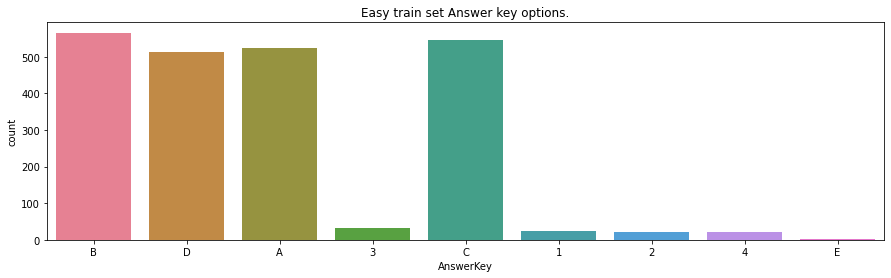

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Easy train set Answer key options.')
sns.countplot(x='AnswerKey', data=df_easy_train,palette="husl", ax=axis1)

<AxesSubplot:title={'center':'Easy test set Answer key options.'}, xlabel='AnswerKey', ylabel='count'>

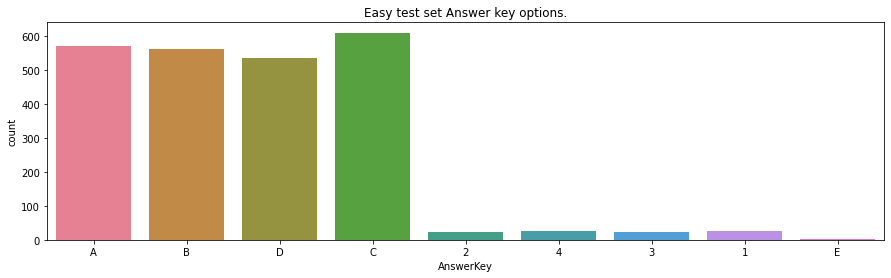

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Easy test set Answer key options.')
sns.countplot(x='AnswerKey', data=df_easy_test,palette="husl", ax=axis1)

In [ ]:
df_easy_train.loc[df_easy_train['AnswerKey']=='E']

,AnswerKey,question
1138,E,A mixture of powdered iron and sulfur is heate...
1941,E,Large amounts of metals like iron and aluminum...


In [ ]:
df_easy_test.loc[df_easy_test['AnswerKey']=='E']

,AnswerKey,question
1441,E,What happens when an animal hibernates? (A) Th...


In [ ]:
a = list(df_challenge_train['AnswerKey'].unique())
print(f'Unique values in challenge train set are {a}')

a = list(df_challenge_test['AnswerKey'].unique())
print(f'Unique values in challenge test set are {a}')

Unique values in challenge train set are ['A', 'B', 'D', 'C', '2', '4', '1', '3']
Unique values in challenge test set are ['C', 'B', 'D', 'A', '2', '4', '3', '1']


<AxesSubplot:title={'center':'Challenge train set Answer key options.'}, xlabel='AnswerKey', ylabel='count'>

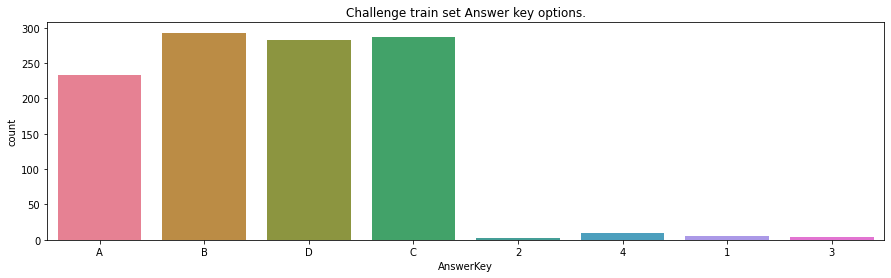

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Challenge train set Answer key options.')
sns.countplot(x='AnswerKey', data=df_challenge_train,palette="husl", ax=axis1)

<AxesSubplot:title={'center':'Challenge test set Answer key options.'}, xlabel='AnswerKey', ylabel='count'>

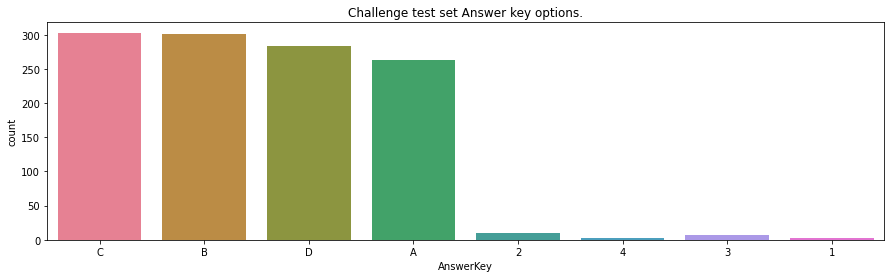

In [ ]:

fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Challenge test set Answer key options.')
sns.countplot(x='AnswerKey', data=df_challenge_test,palette="husl", ax=axis1)

In [ ]:
file = open('/content/drive/My Drive/ARC/ARC_Corpus.txt','r')

In [ ]:
file.readlines()

['Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.\n',
 'Paleoceanography, 8(2): 193-208.\n',
 'Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.\n',
 'The same problems apply with wolf-domestic dog hybrids.\n',
 'taking stock of delightful days\n',
 'The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.\n',
 'ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).\n',
 'until they institute such safeguards and assura

In [ ]:
df_easy_train.head()

,AnswerKey,question
0,B,Which factor will most likely cause a person t...
1,B,Lichens are symbiotic organisms made of green ...
2,D,When a switch is used in an electrical circuit...
3,A,Which of the following is an example of an ass...
4,3,"Rocks are classified as igneous, metamorphic, ..."


In [ ]:
def extract_question(question):
    '''
    This function will take a value in question column then, will split the string 
    at (A) or (1). After splitting we will take only first part which is the question.
    '''
    if '(A)' in question:
        x = question.split('(A)')[0]
    elif '(1)' in question:
        x = question.split('(1)')[0]

    return x

In [ ]:
df_easy_train['only_question'] = df_easy_train['question'].apply(extract_question)

In [ ]:
df_easy_dev['only_question'] = df_easy_dev['question'].apply(extract_question)
df_easy_test['only_question'] = df_easy_test['question'].apply(extract_question)
df_challenge_train['only_question'] = df_challenge_train['question'].apply(extract_question)
df_challenge_dev['only_question'] = df_challenge_dev['question'].apply(extract_question)
df_challenge_test['only_question'] = df_challenge_test['question'].apply(extract_question)

In [ ]:
print('Some examples of questions of easy set are as follows:')
print('------------------------------------------------------\n')
a = np.random.randint(0,high=1000,size=10)

for i in a:
    b = df_easy_train['only_question'].iloc[i]
    print(b + '\n')


Some examples of questions of easy set are as follows:
------------------------------------------------------

The motion of Earth is responsible for several celestial events. Which of the following events is caused by Earth revolving around the sun? 

Based on the evidence available at the time, early models of the solar system stated that all objects in space orbited Earth. In the 16th century, an astronomer reevaluated the evidence and proposed a model of the solar system that is still in use. What part of this model corrected the mistake in previous solar system models? 

Which characteristic is most beneficial for an animal living on a snowy mountain? 

What types of cells are found only in organisms that reproduce sexually? 

Eye color in human beings is an 

The spectrum of visible light can be seen in a rainbow because white light is 

Sharpening a pencil and tearing paper are examples of physical changes. Which statement describes why these are physical changes? 

Which biolog

In [ ]:
df_easy_train['quesiton_length'] = df_easy_train['only_question'].apply(lambda x: len(x))

In [ ]:
df_easy_dev['quesiton_length'] = df_easy_dev['only_question'].apply(lambda x: len(x))
df_easy_test['quesiton_length'] = df_easy_test['only_question'].apply(lambda x: len(x))
df_challenge_train['quesiton_length'] = df_challenge_train['only_question'].apply(lambda x: len(x))
df_challenge_dev['quesiton_length'] = df_challenge_dev['only_question'].apply(lambda x: len(x))
df_challenge_test['quesiton_length'] = df_challenge_test['only_question'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Question lengths in Easy train part')

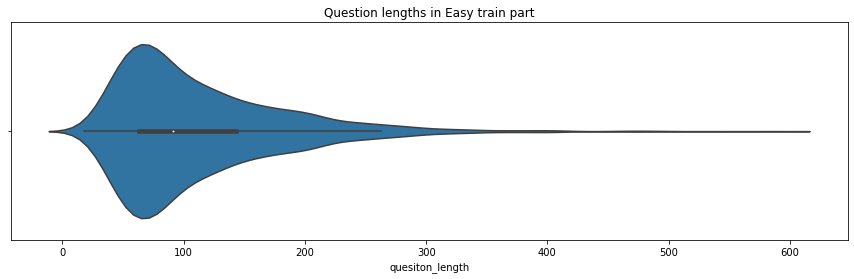

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.violinplot(x='quesiton_length', data=df_easy_train, ax=axis1, orient='v')
plt.title('Question lengths in Easy train part')

In [ ]:
a = np.quantile(df_easy_train['quesiton_length'],0.99)
print(f'99 percentile values of question length in easy train part is less than {a}.')

count = 0 
for i in range(len(df_easy_train)):
    if df_easy_train['quesiton_length'].iloc[i] >= 339:
        count += 1

print(f'Number of questions in easy train part with length greater than 99 percentile are {count}.')

99 percentile values of question length in easy train part is less than 338.5.
Number of questions in easy train part with length greater than 99 percentile are 23.


Text(0.5, 1.0, 'Question lengths in Challenge train part')

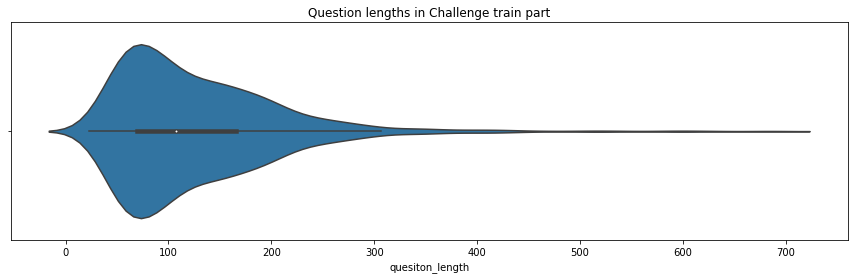

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.violinplot(x='quesiton_length', data=df_challenge_train, ax=axis1, orient='v')
plt.title('Question lengths in Challenge train part')

In [ ]:
a = np.quantile(df_challenge_train['quesiton_length'],0.99)
print(f'99 percentile values of question length in challenge train part is less than {a}.')

count = 0 
for i in range(len(df_challenge_train)):
    if df_challenge_train['quesiton_length'].iloc[i] >= 415:
        count += 1

print(f'Number of questions in challenge train part with length greater than 99 percentile are {count}.')

99 percentile values of question length in challenge train part is less than 414.83999999999924.
Number of questions in challenge train part with length greater than 99 percentile are 12.


In [ ]:
df_easy_train.to_csv('/content/drive/My Drive/ARC/df_easy_train',index=False)
df_easy_dev.to_csv('/content/drive/My Drive/ARC/df_easy_dev',index=False)
df_easy_test.to_csv('/content/drive/My Drive/ARC/df_easy_test',index=False)


In [ ]:
df_challenge_train.to_csv('/content/drive/My Drive/ARC/df_challenge_train',index=False)
df_challenge_dev.to_csv('/content/drive/My Drive/ARC/df_challenge_dev',index=False)
df_challenge_test.to_csv('/content/drive/My Drive/ARC/df_challenge_test',index=False)